In [267]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontman
import random as rn
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [270]:
path = '/Library/Fonts/Arial Unicode.ttf'
prop = fontman.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

In [560]:
def sigm(x):
    return 1./(1+np.exp(-x))

def dsigm(x):
    s = sigm(x)
    return s*(1-s)

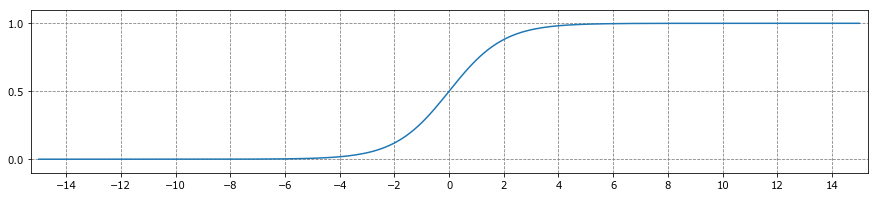

In [1046]:
xlist=np.linspace(-15, 15, 200)
ylist=[sigm(x) for x in xlist]
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xlist,ylist)
plt.margins(.01,.1)
ax.set_xticks(np.arange(-14, 15, 2))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("sigmoid.png", dpi=200,bbox_inches='tight')
plt.show()

In [21]:
def linf(x,a,b):
    return a*x+b

In [46]:
def lsq2(xx,yy):
    c11 = 0.
    c12 = 0.
    c1c = 0.
    c2c = 0.
    for x,y in zip(xx,yy):
        c11 += x*x
        c12 += x
        c1c += x*y
        c2c += y
    c11 *= 2
    c12 *= 2
    c1c *= 2
    c21 = c12
    c22 = 2.*len(xx)
    c2c *=2
    d = c11*c22 - c12*c21
    if d==0: return 0,0
    d1 = c1c*c22 - c2c*c12
    d2 = c2c*c11 - c1c*c21
    return d1/d,d2/d

In [140]:
xx1=[-10,0,10,15,30,35,40]
yy1=[0,0,0,0,1,1,1]

In [56]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('blue')
        else:
            cols.append('red')
    return cols

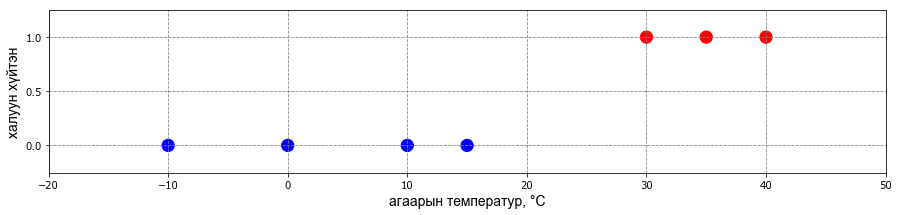

In [1047]:
plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
cols=pltcolor(yy1)
plt.scatter(xx1,yy1,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'халуун хүйтэн',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.2)
ax.set_xticks(np.arange(-20, 51, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp1.png", dpi=150,bbox_inches='tight')
plt.show()

In [1050]:
a,b=lsq2(xx1,yy1)
a,b

(0.025597269624573378, -0.010238907849829351)

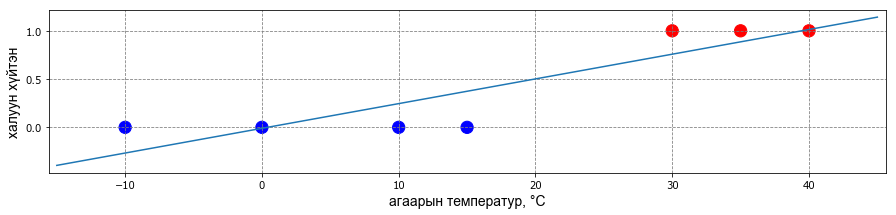

In [1051]:
xres=np.linspace(-15,45,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[linf(x,a,b) for x in xres])
cols=pltcolor(yy1)
plt.scatter(xx1,yy1,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'халуун хүйтэн',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-10, 41, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("lin1.png", dpi=150,bbox_inches='tight')
plt.show()

In [1052]:
def Elin(a,b,xx,yy):
    e = 0
    for x,y in zip(xx,yy):
        s = a*x + b - y
        e += s*s
    return e

def Elinlist(X,Y,xx,yy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Elin(X[i,k],Y[i,k],xx,yy)
    return Z

def dElin(a,b,xx,yy):
    d1 = 0
    d2 = 0
    for x,y in zip(xx,yy):
        s = a*x + b - y
        d1 += x*s
        d2 += s
    return 2*d1,2*d2

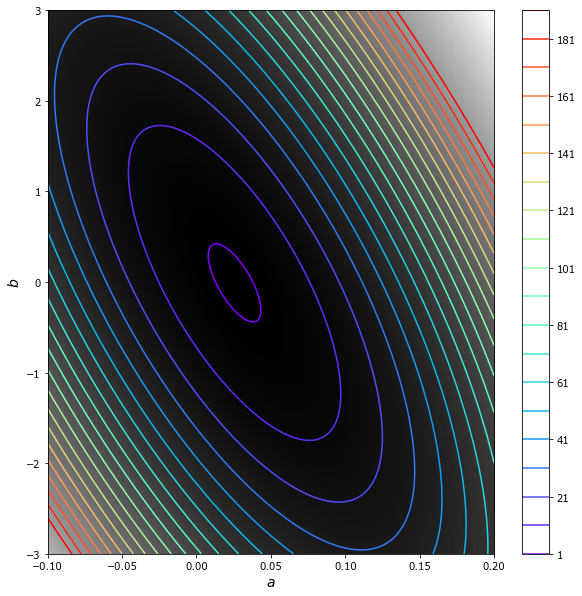

In [1054]:
x1 = -.1
x2 = .2
y1 = -3.
y2 = 3.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Elinlist(X,Y,xx1,yy1)
plt.figure(figsize=(10,10))
cvals = np.arange(1,200,10)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.xlabel('$a$',size=14)
plt.ylabel('$b$',size=14)
#plt.savefig("elin1.png", dpi=200,bbox_inches='tight')
plt.show()

In [1120]:
fig = pylab.figure()
ax = Axes3D(fig)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.contour3D(X, Y, Z, 300, cmap='rainbow')
ax.view_init(30, -80)
plt.xlabel('$a$',size=14)
plt.ylabel('$b$',size=14)
#plt.savefig("elin3d1.png", dpi=200,bbox_inches='tight')
pylab.show()

AttributeError: 'module' object has no attribute 'zlabel'

In [ ]:
xx1=[-10,0,10,30,35,40]
yy1=[0,0,0,1,1,1]

In [492]:
def Eper(a,b,xx,yy):
    e = 0
    for x,y in zip(xx,yy):
        s = sigm(a*x+b) - y
        e += s*s
    return e

def Eperlist(X,Y,xx,yy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Eper(X[i,k],Y[i,k],xx,yy)
    return Z

def dEper(a,b,xx,yy):
    d1 = 0
    d2 = 0
    for x,y in zip(xx,yy):
        z = a*x + b
        s = (sigm(z) - y)*dsigm(z)
        d1 += x*s
        d2 += s
    return 2*d1,2*d2

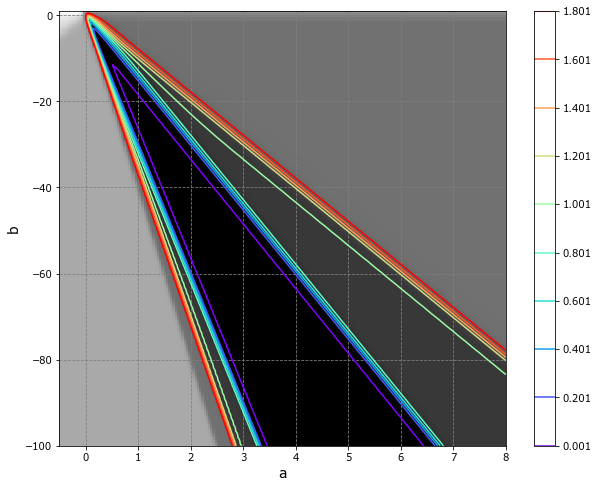

In [1124]:
x1 = -.5
x2 = 8.
y1 = -100.
y2 = 1.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Eperlist(X,Y,xx1,yy1)
plt.figure(figsize=(10,8))
cvals = np.arange(.001,2,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("epin1.png", dpi=200,bbox_inches='tight')
plt.show()

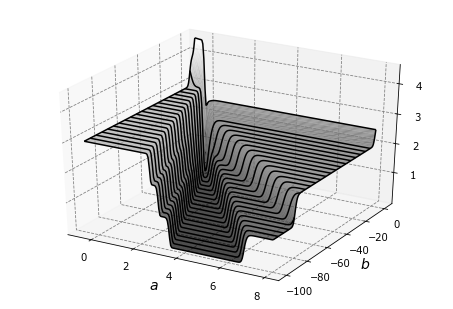

In [1123]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gray)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=1000,color='black')
#ax.contour3D(X, Y, Z, 20, cmap='rainbow')
#ax.view_init(30, -80)
plt.xlabel('$a$',size=14)
plt.ylabel('$b$',size=14)
#plt.savefig("epin3d1.png", dpi=200,bbox_inches='tight')
pylab.show()

In [1137]:
Eper(2,-40,xx1,yy1),Eper(3,-60,xx1,yy1),Eper(3,-80,xx1,yy1),Eper(4,-80,xx1,yy1),Eper(4,-100,xx1,yy1),Eper(5,-100,xx1,yy1),Eper(6,-100,xx1,yy1)

(2.0609664912201812e-09,
 9.3576172438073897e-14,
 2.0609664827196683e-09,
 4.2483542377785679e-18,
 4.2483545427367471e-18,
 1.9287498479103447e-22,
 2.0609664827234725e-09)

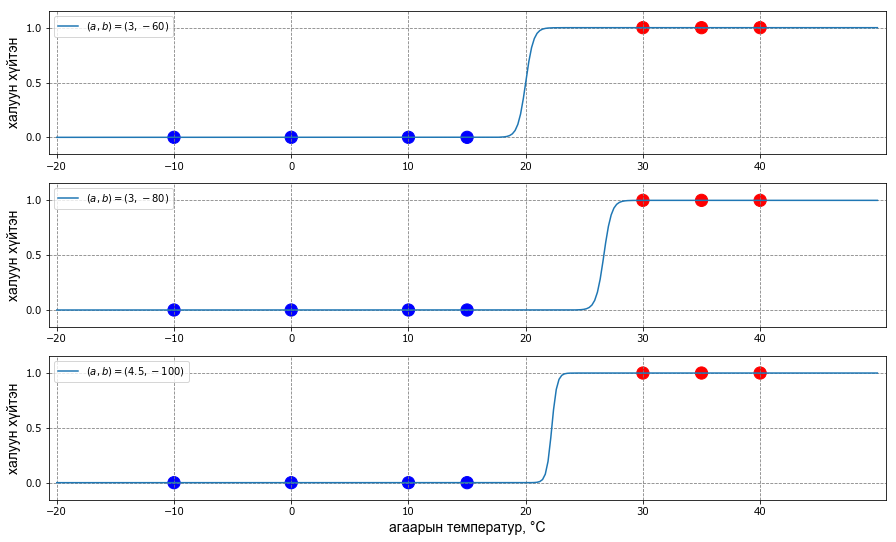

In [1133]:
xres=np.linspace(-20,50,300)
fig = plt.figure(figsize=(15,9))
ax = plt.subplot(3,1,1)
plt.plot(xres,[sigm(linf(x,3,-60)) for x in xres],label="$(a,b)=(3,-60)$")
cols=pltcolor(yy1)
plt.scatter(xx1,yy1,s=150,c=cols)
plt.ylabel(u'халуун хүйтэн',fontproperties=prop, size=14)
plt.legend()
plt.margins(.01,.1)
ax.set_xticks(np.arange(-20, 50, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()

ax = plt.subplot(3,1,2)
plt.plot(xres,[sigm(linf(x,3,-80)) for x in xres],label="$(a,b)=(3,-80)$")
cols=pltcolor(yy1)
plt.scatter(xx1,yy1,s=150,c=cols)
plt.ylabel(u'халуун хүйтэн',fontproperties=prop, size=14)
plt.legend()
plt.margins(.01,.1)
ax.set_xticks(np.arange(-20, 50, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()

ax = plt.subplot(3,1,3)
plt.plot(xres,[sigm(linf(x,4.5,-100)) for x in xres],label="$(a,b)=(4.5,-100)$")
cols=pltcolor(yy1)
plt.scatter(xx1,yy1,s=150,c=cols)
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'халуун хүйтэн',fontproperties=prop, size=14)
plt.legend()
plt.margins(.01,.1)
ax.set_xticks(np.arange(-20, 50, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()

#plt.savefig("pin1.png", dpi=150,bbox_inches='tight')
plt.show()

In [201]:
xx2=[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
yy2=[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

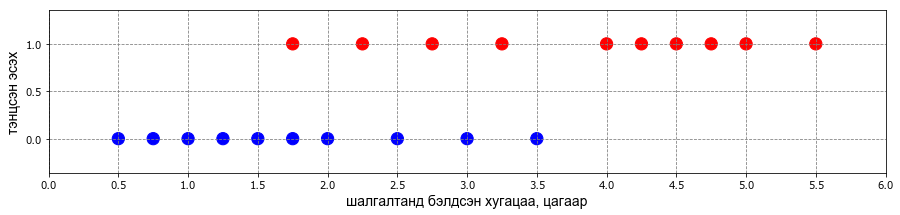

In [1138]:
plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
cols=pltcolor(yy2)
plt.scatter(xx2,yy2,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'шалгалтанд бэлдсэн хугацаа, цагаар',fontproperties=prop, size=14)
plt.ylabel(u'тэнцсэн эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.3)
ax.set_xticks(np.arange(-0, 6.1, .5))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("examhours.png", dpi=150,bbox_inches='tight')
plt.show()

In [293]:
a,b=lsq2(xx2,yy2)
a,b

(0.23459561219317934, -0.15393526898848744)

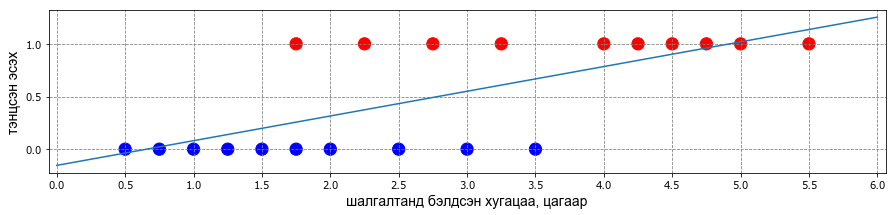

In [294]:
xres=np.linspace(0,6,200)
plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[linf(x,a,b) for x in xres])
cols=pltcolor(yy2)
plt.scatter(xx2,yy2,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'шалгалтанд бэлдсэн хугацаа, цагаар',fontproperties=prop, size=14)
plt.ylabel(u'тэнцсэн эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(0, 6.1, .5))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

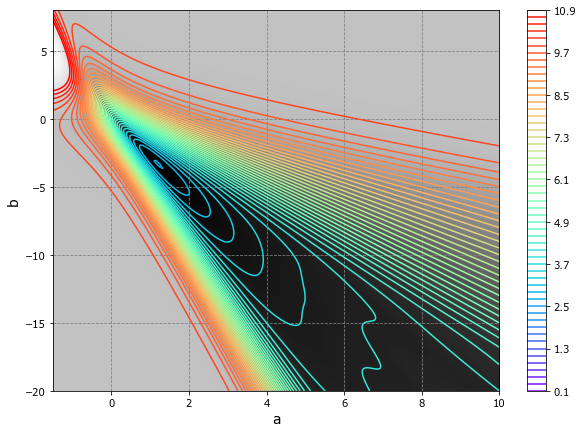

In [1142]:
x1 = -1.5
x2 = 10.
y1 = -20.
y2 = 8.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Eperlist(X,Y,xx2,yy2)
plt.figure(figsize=(10,7))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elin2.png", dpi=200,bbox_inches='tight')
plt.show()

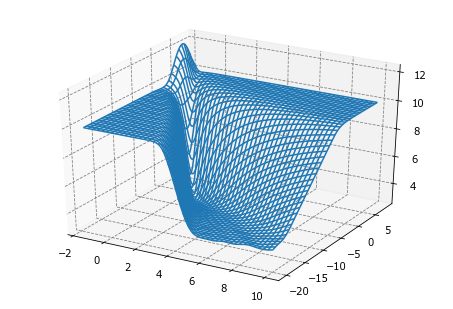

In [617]:
fig = pylab.figure()
ax = Axes3D(fig)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
pylab.show()

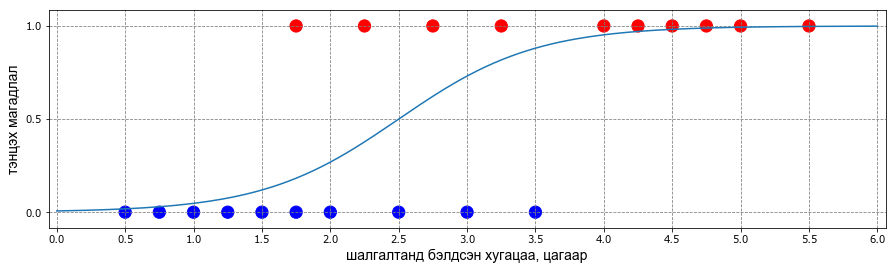

In [1140]:
xres=np.linspace(0,6,200)
fig = plt.figure(figsize=(15,4))
ax = fig.gca()
plt.plot(xres,[sigm(linf(x,2,-5)) for x in xres])
cols=pltcolor(yy2)
plt.scatter(xx2,yy2,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'шалгалтанд бэлдсэн хугацаа, цагаар',fontproperties=prop, size=14)
plt.ylabel(u'тэнцэх магадлал',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(0, 6.1, .5))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("lin2.png", dpi=150,bbox_inches='tight')
plt.show()

In [248]:
xx4=[-10,0,10,20,25,30,40,50,60]
yy4=[0,0,0,1,1,1,0,0,0]

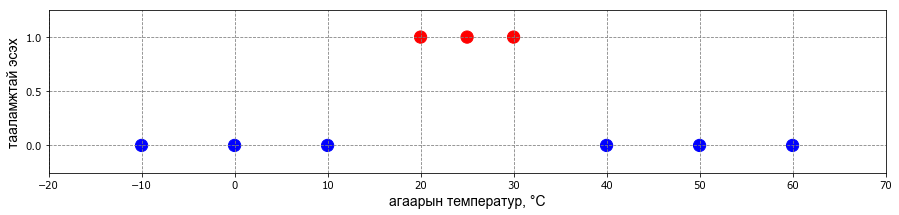

In [1276]:
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.2)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1.png", dpi=150,bbox_inches='tight')
plt.show()

In [371]:
a4,b4=lsq2(xx4,yy4)
a4,b4

(0.0, 0.3333333333333333)

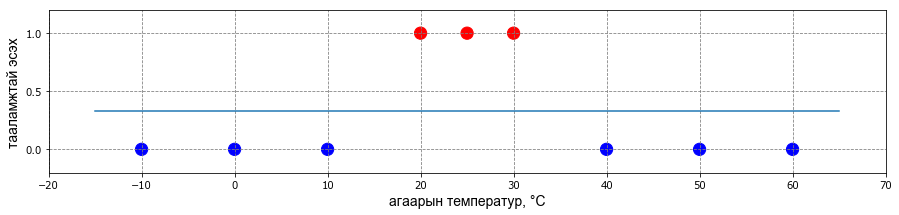

In [372]:
xres=np.linspace(-15,65,200)
plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[linf(x,a4,b4) for x in xres])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.2)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [300]:
import matplotlib.font_manager
#print matplotlib.font_manager.findSystemFonts(fontpaths=None)

In [681]:
a1,b1=lsq2(xx4[:6],yy4[:6])
a2,b2=lsq2(xx4[3:],yy4[3:])
a1,b1,a2,b2

(0.031578947368421054,
 0.10526315789473684,
 -0.031578947368421054,
 1.6842105263157894)

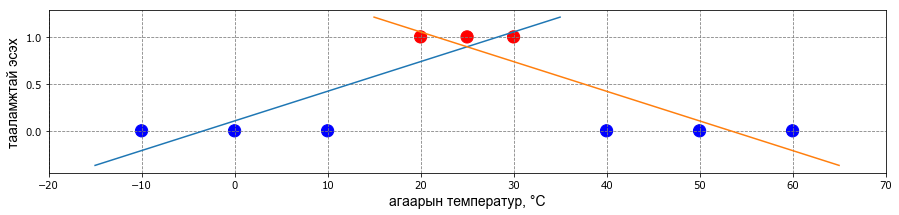

In [1277]:
xres1=np.linspace(-15,35,200)
xres2=np.linspace(15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres1,[linf(x,a1,b1) for x in xres1])
plt.plot(xres2,[linf(x,a2,b2) for x in xres2])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1lin.png", dpi=150,bbox_inches='tight')
plt.show()

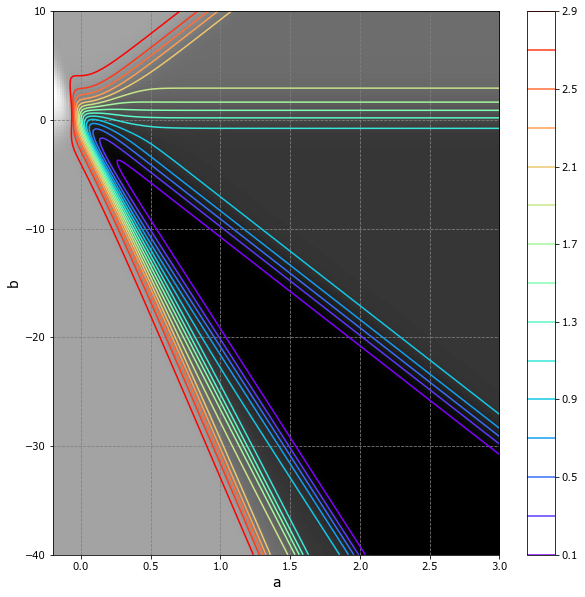

In [623]:
x1 = -.2
x2 = 3.
y1 = -40.
y2 = 10.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Eperlist(X,Y,xx4[:6],yy4[:6])
plt.figure(figsize=(10,10))
cvals = np.arange(.1,3,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elin.png", dpi=200)
plt.show()

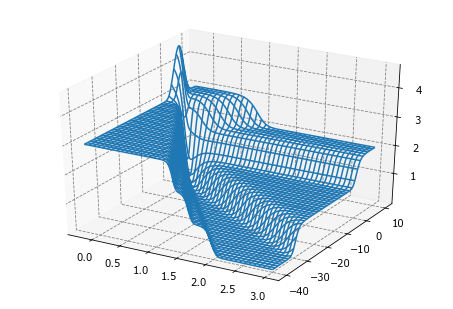

In [624]:
fig = pylab.figure()
ax = Axes3D(fig)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
pylab.show()

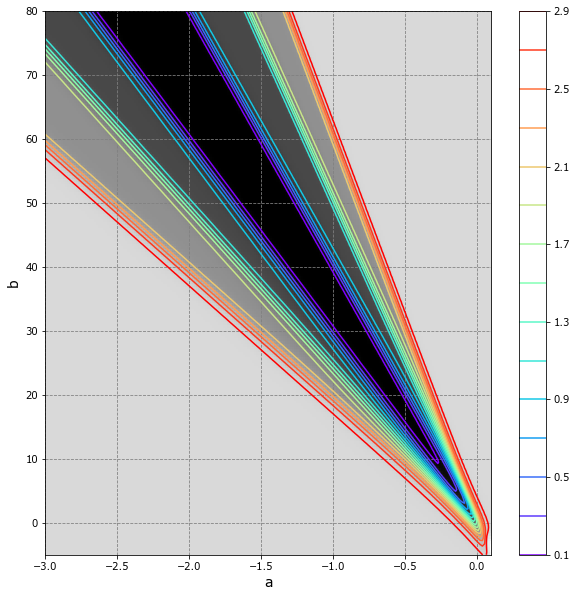

In [625]:
x1 = -3.
x2 = .1
y1 = -5.
y2 = 80.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Eperlist(X,Y,xx4[3:],yy4[3:])
plt.figure(figsize=(10,10))
cvals = np.arange(.1,3,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elin.png", dpi=200)
plt.show()

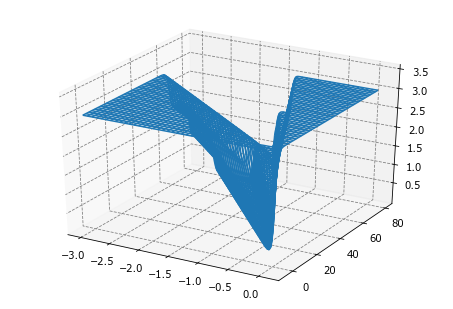

In [626]:
fig = pylab.figure()
ax = Axes3D(fig)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
pylab.show()

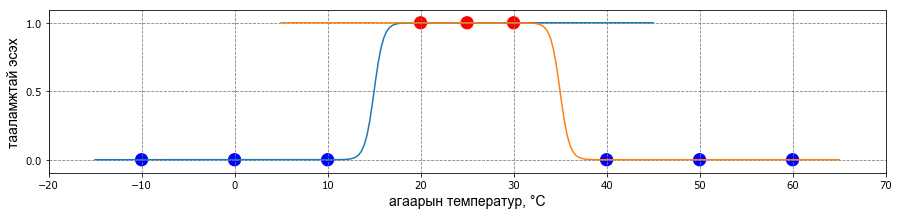

In [1278]:
xres1=np.linspace(-15,45,200)
xres2=np.linspace(5,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres1,[sigm(linf(x,2,-30)) for x in xres1])
plt.plot(xres2,[sigm(linf(x,-2,70)) for x in xres2])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1pp.png", dpi=150,bbox_inches='tight')
plt.show()

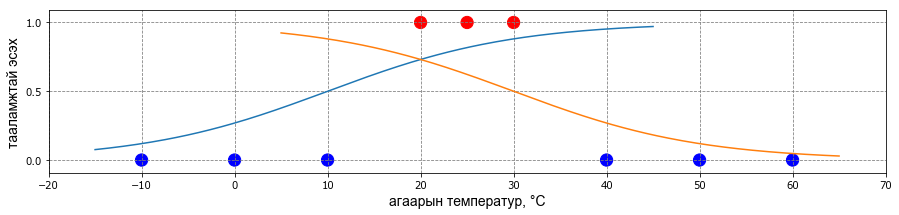

In [1328]:
xres1=np.linspace(-15,45,200)
xres2=np.linspace(5,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres1,[sigm(linf(x,.1,-1)) for x in xres1])
plt.plot(xres2,[sigm(linf(x,-.1,3)) for x in xres2])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1pp.png", dpi=150,bbox_inches='tight')
plt.show()

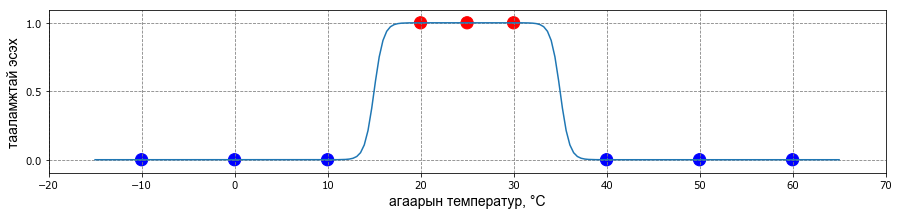

In [1280]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[sigm(linf(x,2,-30))+sigm(linf(x,-2,70))-1 for x in xres])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1h.png", dpi=150,bbox_inches='tight')
plt.show()

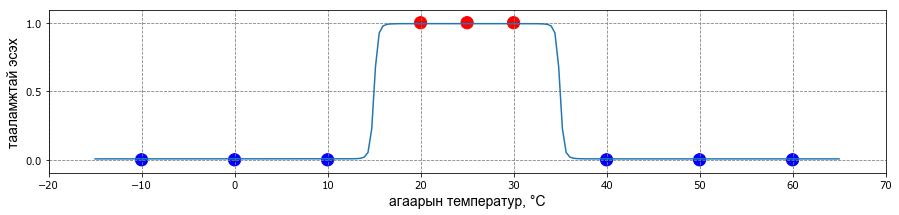

In [376]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[sigm(10*sigm(linf(x,2,-30))+10*sigm(linf(x,-2,70))-15) for x in xres])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [343]:
thi1=[[28,25,0],[27,30,0],[25,40,0],[23,55,0],[22,65,0],[25,30,0],[22,45,0],[22,25,0],[35,25,1],[37,35,1],[32,40,1],
      [36,60,1],[34,70,1],[28,70,1],[27,75,1],[24,100,1],[31,95,1],[38,85,1]]

In [353]:
thi1[0]

[28, 25, 0]

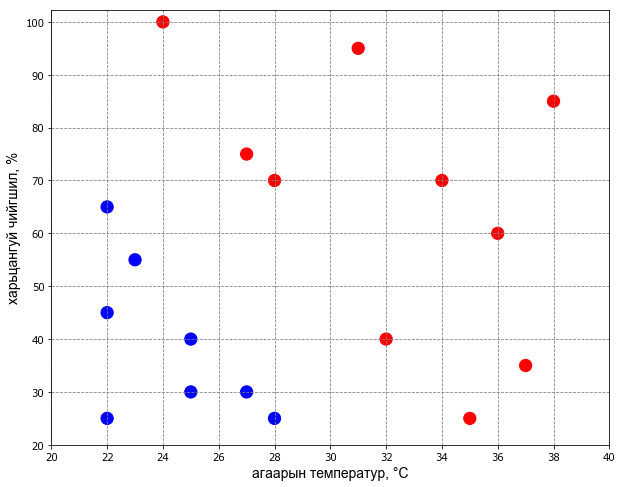

In [1157]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(20, 41, 2))
ax.set_yticks(np.arange(20, 101, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temphum.png", dpi=150,bbox_inches='tight')
plt.show()

In [379]:
def sigthi(X,Y,a,b,c):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = sigm(a*X[i,k]+b*Y[i,k]+c)
    return Z

In [634]:
def linthi(X,Y,a,b,c):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = a*X[i,k]+b*Y[i,k]+c
    return Z

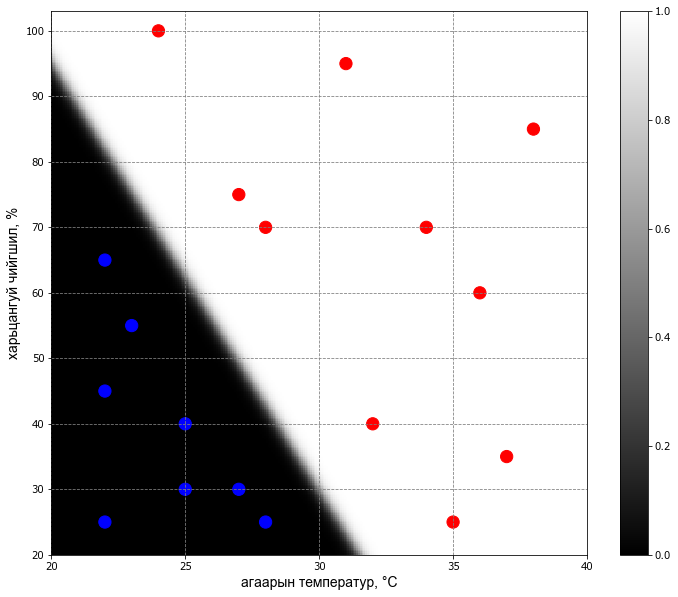

In [627]:
x1 = 20.
x2 = 40.
y1 = 20.
y2 = 103.
nx = 300
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = sigthi(X,Y,6.5,1,-225)
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(x1, x2+dx, 5))
ax.set_yticks(np.arange(y1, y2+dy, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.colorbar()
#plt.savefig("temp.png", dpi=150)
plt.show()

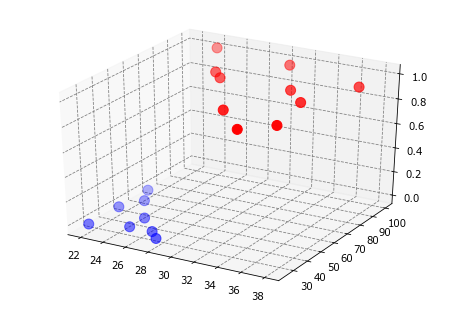

In [633]:
fig = pylab.figure()
ax = Axes3D(fig)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.gray)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.scatter([r[0] for r in thi1],[r[1] for r in thi1],[r[2] for r in thi1],s=100,c=cols)
pylab.show()

In [ ]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.gray)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.scatter([r[0] for r in thi1],[r[1] for r in thi1],[r[2] for r in thi1],s=100,c=cols)
pylab.show()

In [445]:
def graddescent(df,x0,eta=1.,numit=10):
    x = x0
    xx = []
    xx.append(x)
    for i in range(numit):
        y = df(x)
        x = [xi - eta*yi for xi,yi in zip(x,y)]
        xx.append(x)
    return xx

In [948]:
def gradmomentum(df,x0,eta=1.,numit=10,beta=.5):
    beta1 = 1 - beta
    x = x0
    xx = []
    xx.append(x)
    v = df(x)
    for i in range(numit):
        y = df(x)
        v = [beta*vi + beta1*yi for vi,yi in zip(v,y)]
        x = [xi - eta*vi for xi,vi in zip(x,v)]
        xx.append(x)
    return xx

In [1022]:
def graddescentn(df,x0,eta=1.,numit=10,f0=10,f=.9):
    n = len(x0)
    x = x0
    xx = []
    xx.append(x)
    ff = f0
    for i in range(numit):
        y = df(x) + np.random.randn(n)*ff
        x = [xi - eta*yi for xi,yi in zip(x,y)]
        xx.append(x)
        ff *= f
    return xx

In [451]:
a,b=lsq2(xx1,yy1)
a,b

(0.025597269624573378, -0.010238907849829351)

In [539]:
abh = graddescent(lambda ab:dElin(ab[0],ab[1],xx1,yy1),[.15,1.],.0001,5000)
abh[-1]

[0.02474290764065441, 0.019282665102547614]

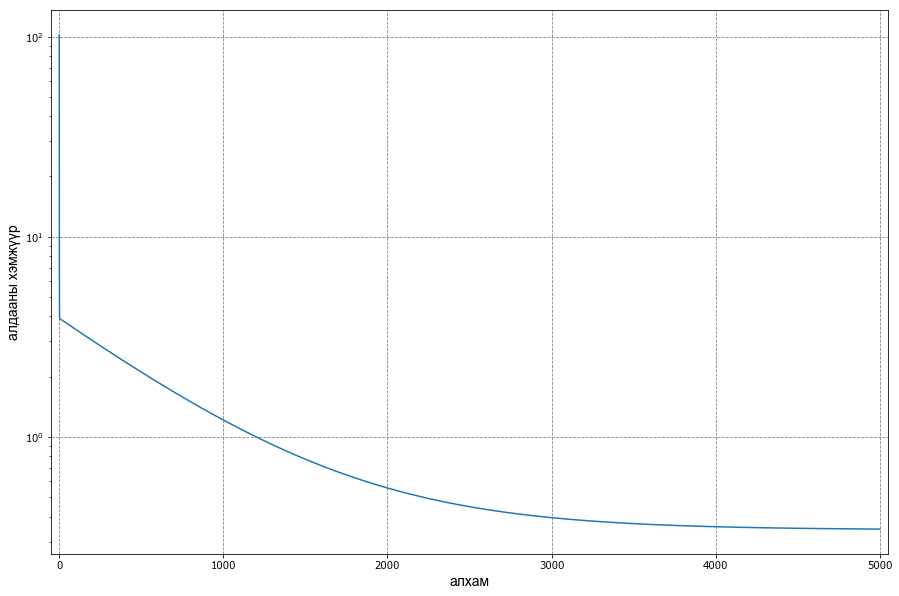

In [1073]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(abh)
plt.plot([Elin(abh[i][0],abh[i][1],xx1,yy1) for i in range(n)])
plt.xlabel(u'алхам',fontproperties=prop, size=14)
plt.ylabel(u'алдааны хэмжүүр',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("elge1.png", dpi=150,bbox_inches='tight')
plt.show()

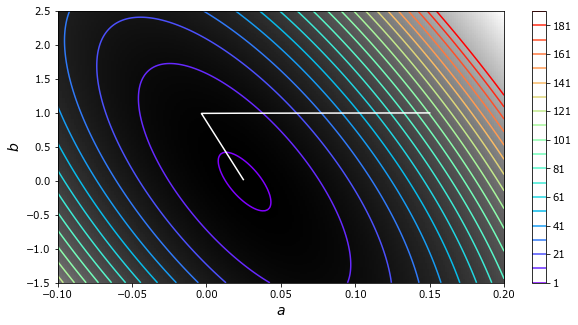

In [1076]:
x1 = -.1
x2 = .2
y1 = -1.5
y2 = 2.5
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Elinlist(X,Y,xx1,yy1)
plt.figure(figsize=(10,5))
cvals = np.arange(1,200,10)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.plot([r[0] for r in abh],[r[1] for r in abh],'w')
plt.xlabel('$a$',size=14)
plt.ylabel('$b$',size=14)
#plt.savefig("elg1.png", dpi=200,bbox_inches='tight')
plt.show()

In [541]:
abl2 = graddescent(lambda ab:dElin(ab[0],ab[1],xx2,yy2),[0.,-2.],.001,1000)
abl2[-1]

[0.23474157220536085, -0.15444459494110935]

In [474]:
a,b=lsq2(xx2,yy2)
a,b

(0.23459561219317934, -0.15393526898848744)

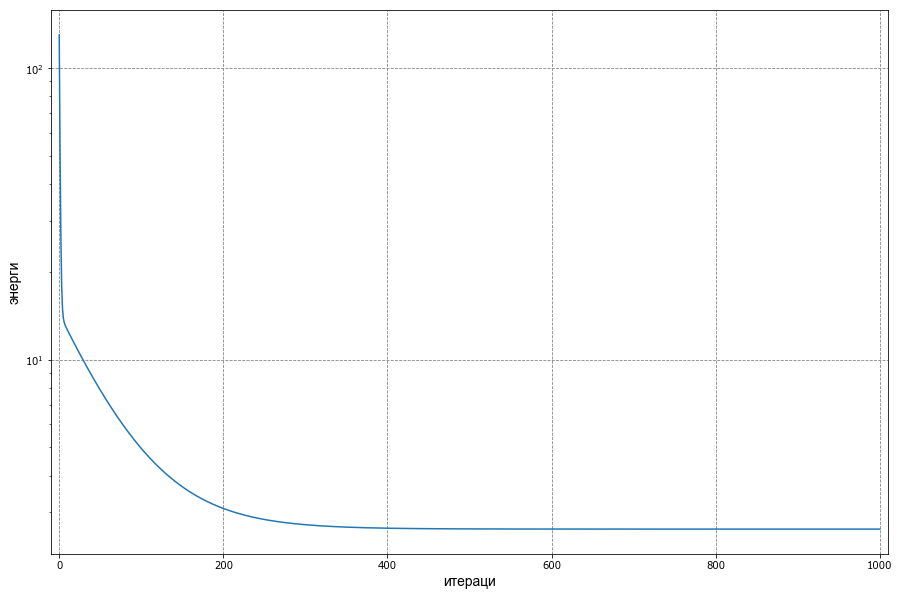

In [824]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(abl2)
plt.plot([Elin(abl2[i][0],abl2[i][1],xx2,yy2) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

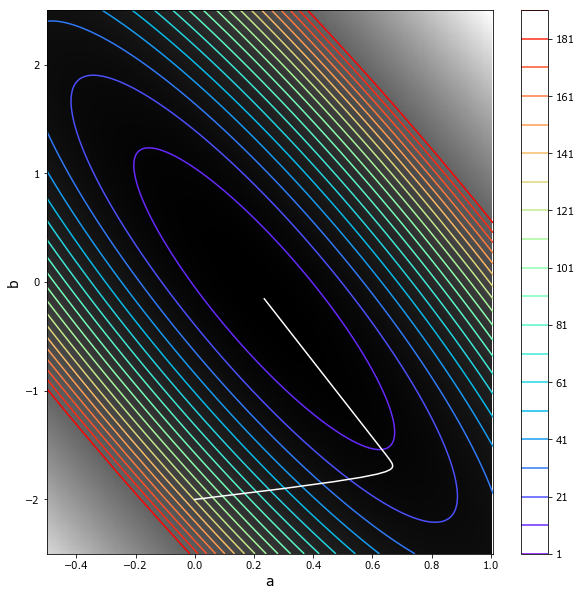

In [542]:
x1 = -.5
x2 = 1.
y1 = -2.5
y2 = 2.5
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Elinlist(X,Y,xx2,yy2)
plt.figure(figsize=(10,10))
cvals = np.arange(1,200,10)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.plot([r[0] for r in abl2],[r[1] for r in abl2],'w')
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
#plt.savefig("elin.png", dpi=200)
plt.show()

In [558]:
abp = graddescent(lambda ab:dEper(ab[0],ab[1],xx1,yy1),[5.,-42.],1,10000)
abp[-1]

[2.2820607050117916, -42.268676621346451]

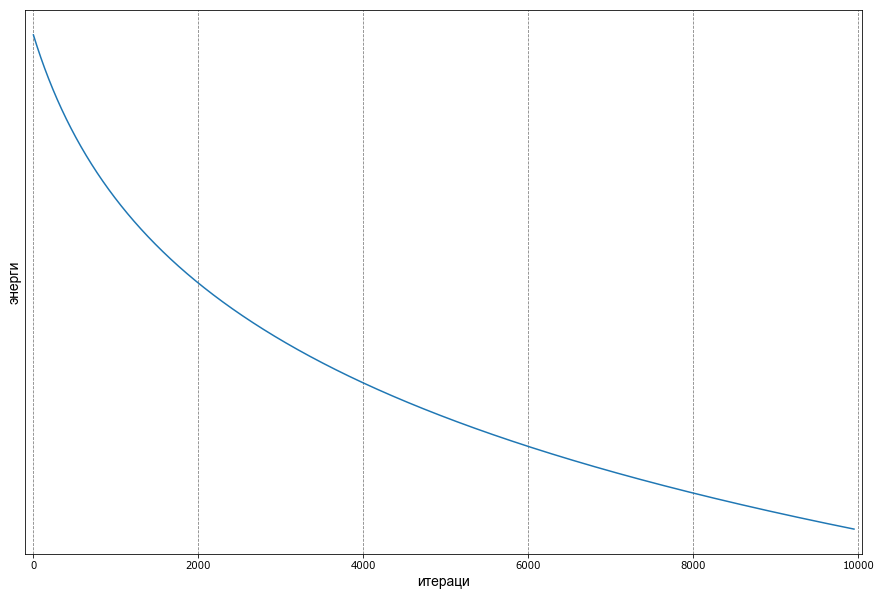

In [828]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(abp)
plt.plot([Elin(abp[i][0],abp[i][1],xx1,yy1) for i in range(50,n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

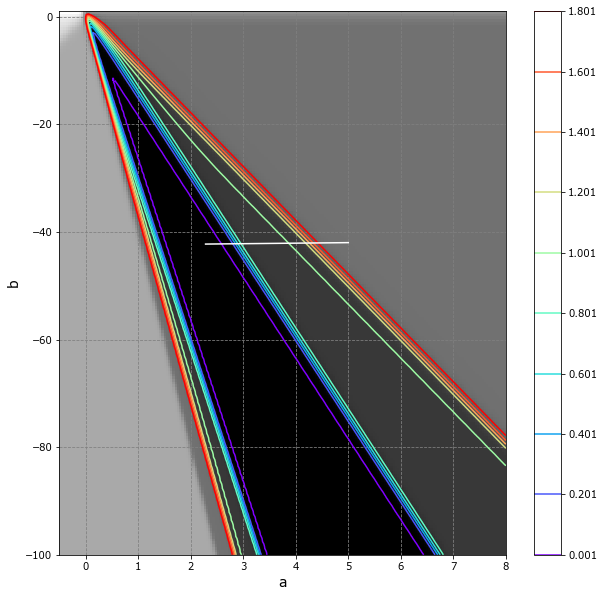

In [559]:
x1 = -.5
x2 = 8.
y1 = -100.
y2 = 1.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Eperlist(X,Y,xx1,yy1)
plt.figure(figsize=(10,10))
cvals = np.arange(.001,2,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.plot([r[0] for r in abp],[r[1] for r in abp],'w')
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elin.png", dpi=200)
plt.show()

In [1154]:
ab2 = graddescent(lambda ab:dEper(ab[0],ab[1],xx2,yy2),[4.,0.],.01,1500)
ab2[-1],Eper(ab2[-1][0],ab2[-1][1],xx1,yy1)

([1.1643022230703655, -3.190826164133798], 2.0011332402298789)

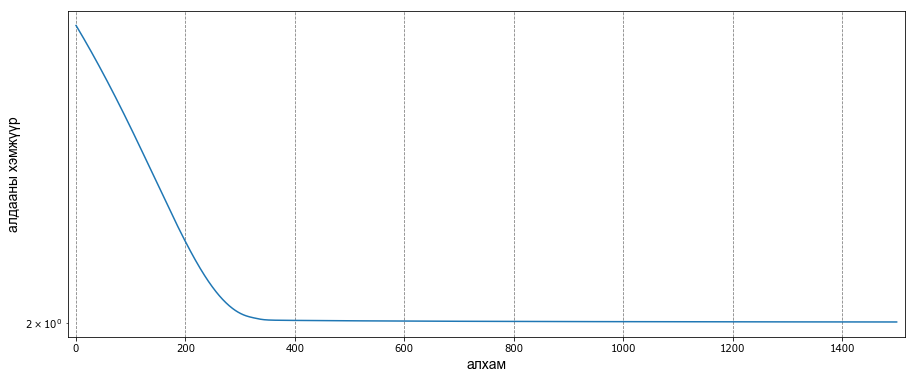

In [1150]:
fig = plt.figure(figsize=(15,6))
ax = fig.gca()
n = len(ab2)
plt.plot([Eper(ab2[i][0],ab2[i][1],xx1,yy1) for i in range(n)])
plt.xlabel(u'алхам',fontproperties=prop, size=14)
plt.ylabel(u'алдааны хэмжүүр',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

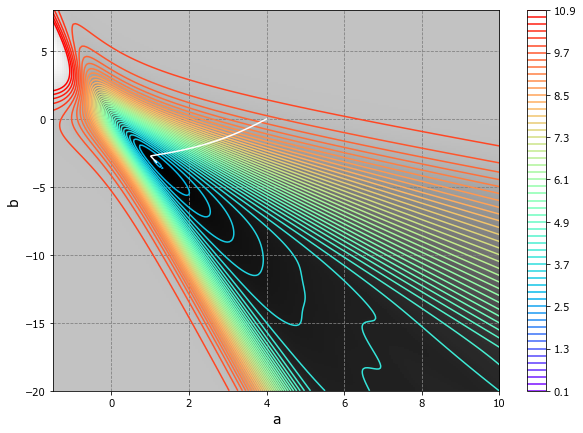

In [1143]:
x1 = -1.5
x2 = 10.
y1 = -20.
y2 = 8.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Eperlist(X,Y,xx2,yy2)
plt.figure(figsize=(10,7))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.plot([r[0] for r in ab2],[r[1] for r in ab2],'w')
plt.xlabel('a',size=14)
plt.ylabel('b',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elg2.png", dpi=200,bbox_inches='tight')
plt.show()

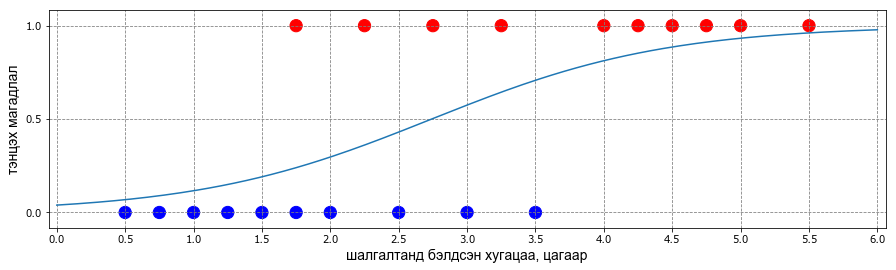

In [1152]:
xres=np.linspace(0,6,200)
fig = plt.figure(figsize=(15,4))
ax = fig.gca()
plt.plot(xres,[sigm(linf(x,ab2[-1][0],ab2[-1][1])) for x in xres])
cols=pltcolor(yy2)
plt.scatter(xx2,yy2,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'шалгалтанд бэлдсэн хугацаа, цагаар',fontproperties=prop, size=14)
plt.ylabel(u'тэнцэх магадлал',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(0, 6.1, .5))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("lin2g.png", dpi=150,bbox_inches='tight')
plt.show()

In [646]:
def Eln(a,xy):
    e = 0
    for x in xy:
        s = a[-1] - x[-1]
        for i in range(len(a)-1):
             s += a[i]*x[i]
        e += s*s
    return e

def Elnlist(X,Y,xx,yy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Eln(X[i,k],Y[i,k],xx,yy)
    return Z

def dEln(a,xy):
    d = [0]*len(a)
    for x in xy:
        s = a[-1] - x[-1]
        for i in range(len(a)-1):
             s += a[i]*x[i]
        for i in range(len(d)-1):
            d[i] += x[i]*s
        d[-1] += s
    return d

In [659]:
an = graddescent(lambda a:dEln(a,thi1),[6.5,1,-225],.000001,1000)
an[-1]

[6.654360677661337, 0.5139447999246903, -224.87313667148146]

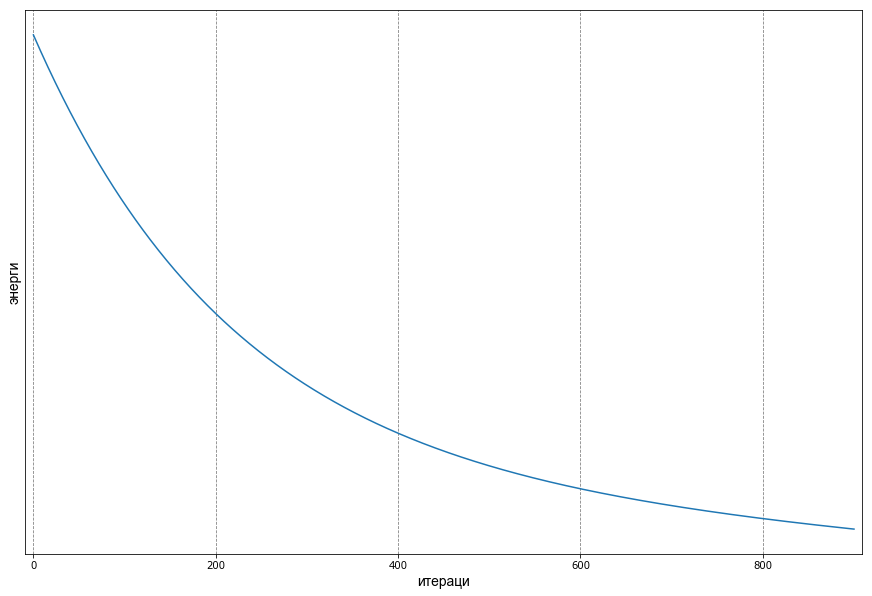

In [852]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(an)
plt.plot([Eln(an[i],thi1) for i in range(100,n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

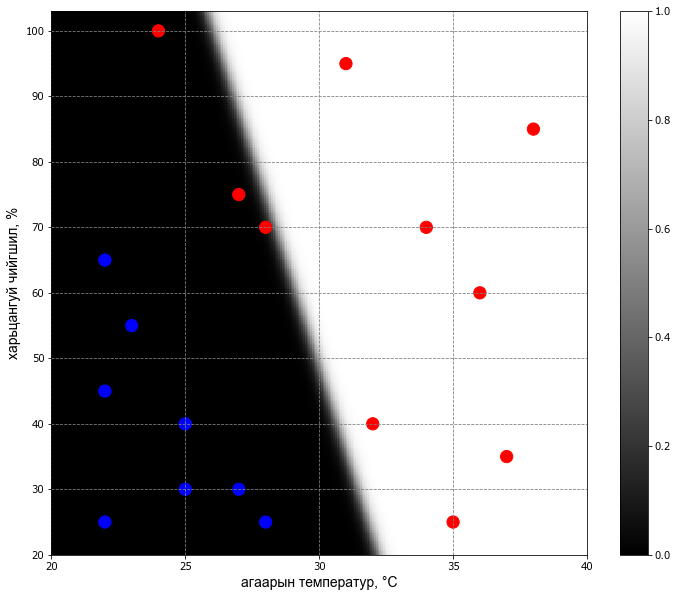

In [670]:
x1 = 20.
x2 = 40.
y1 = 20.
y2 = 103.
nx = 300
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = sigthi(X,Y,an[-1][0],an[-1][1],an[-1][2])
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(x1, x2+dx, 5))
ax.set_yticks(np.arange(y1, y2+dy, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.colorbar()
#plt.savefig("temp.png", dpi=150)
plt.show()

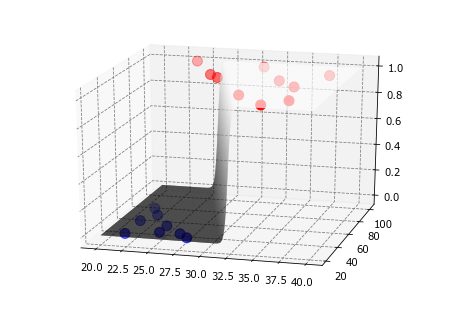

In [675]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.gray)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.scatter([r[0] for r in thi1],[r[1] for r in thi1],[r[2] for r in thi1],s=100,c=cols)
ax.view_init(20, -75)
pylab.show()

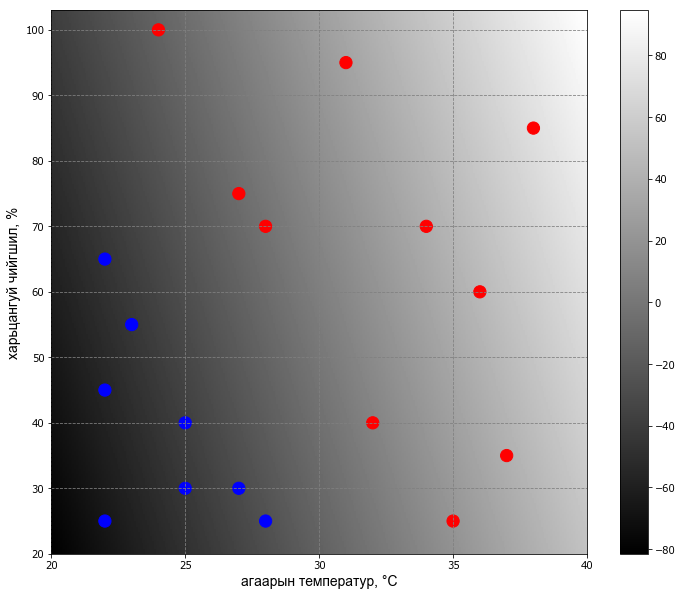

In [677]:
x1 = 20.
x2 = 40.
y1 = 20.
y2 = 103.
nx = 300
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = linthi(X,Y,an[-1][0],an[-1][1],an[-1][2])
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(x1, x2+dx, 5))
ax.set_yticks(np.arange(y1, y2+dy, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.colorbar()
#plt.savefig("temp.png", dpi=150)
plt.show()

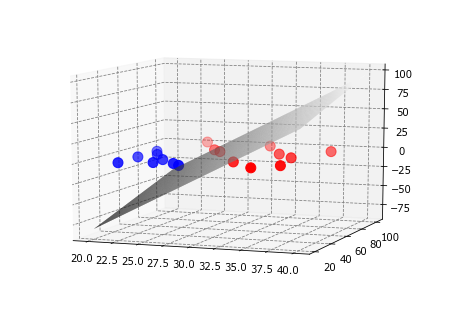

In [679]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.gray)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax.scatter([r[0] for r in thi1],[r[1] for r in thi1],[r[2] for r in thi1],s=100,c=cols)
ax.view_init(10, -70)
pylab.show()

In [1169]:
def Epn(a,xy):
    e = 0
    for x in xy:
        z = a[-1]
        for i in range(len(a)-1):
             z += a[i]*x[i]
        s = sigm(z)-x[-1]
        e += s*s
    return e

def Epnlist12(X,Y,c,xy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Epn([X[i,k],Y[i,k],c],xy)
    return Z

def Epnlist13(X,Y,c,xy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Epn([X[i,k],c,Y[i,k]],xy)
    return Z

def Epnlist23(X,Y,c,xy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Epn([c,X[i,k],Y[i,k]],xy)
    return Z

def dEpn(a,xy):
    d = [0]*len(a)
    for x in xy:
        z = a[-1]
        for i in range(len(a)-1):
             z += a[i]*x[i]
        s = (sigm(z)-x[-1])*dsigm(z)
        for i in range(len(d)-1):
            d[i] += x[i]*s
        d[-1] += s
    return d

In [1263]:
an = graddescent(lambda a:dEpn(a,thi1),[7,2,-225],.1,1000)
an[-1]

[6.2915024558725454, 0.89051502426713136, -225.02910532148258]

In [1264]:
Epn(an[-1],thi1),Epn([5.5,1.5,an[-1][2]],thi1),Epn([7,.75,an[-1][2]],thi1)

(1.2553843086272291e-10, 4.9586969847613266e-05, 1.1811506988918377e-09)

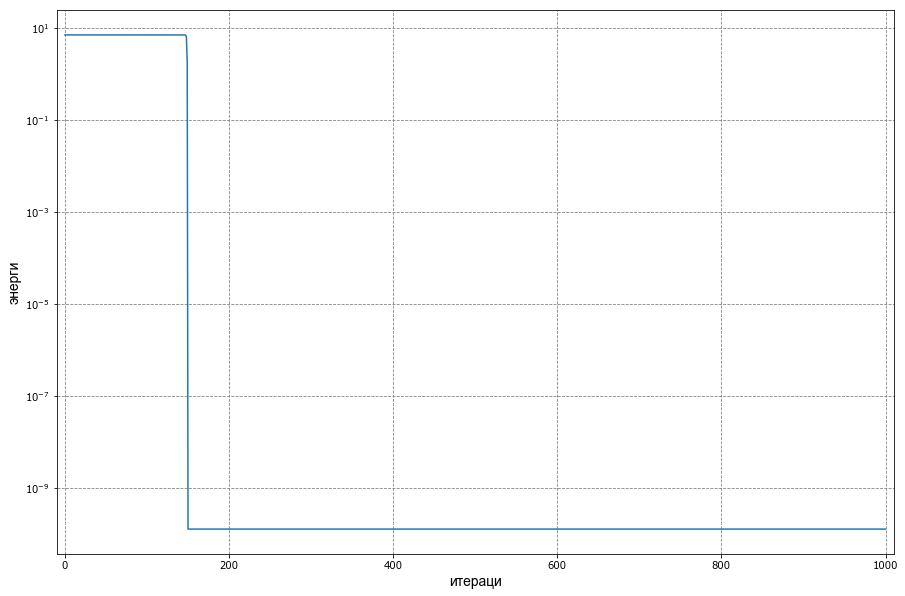

In [1265]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(an)
plt.plot([Epn(an[i],thi1) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

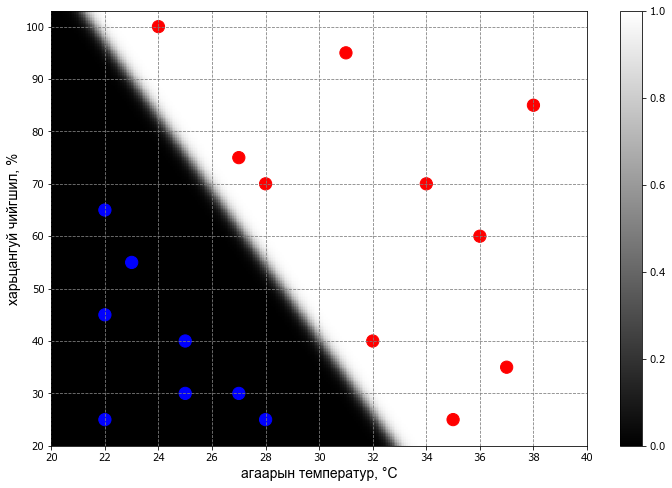

In [1266]:
x1 = 20.
x2 = 40.
y1 = 20.
y2 = 103.
nx = 300
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = sigthi(X,Y,an[-1][0],an[-1][1],an[-1][2])
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(x1, x2+dx, 2))
ax.set_yticks(np.arange(y1, y2+dy, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.colorbar()
#plt.savefig("temphump.png", dpi=150,bbox_inches='tight')
plt.show()

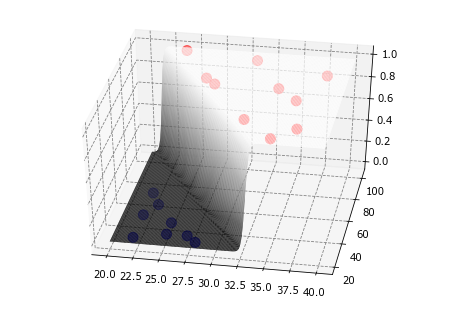

In [1200]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.gray,zorder=0)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=1000,zorder=1)
ax.scatter([r[0] for r in thi1],[r[1] for r in thi1],[r[2] for r in thi1],s=100,c=cols,zorder=2)
ax.view_init(40, -80)
pylab.show()

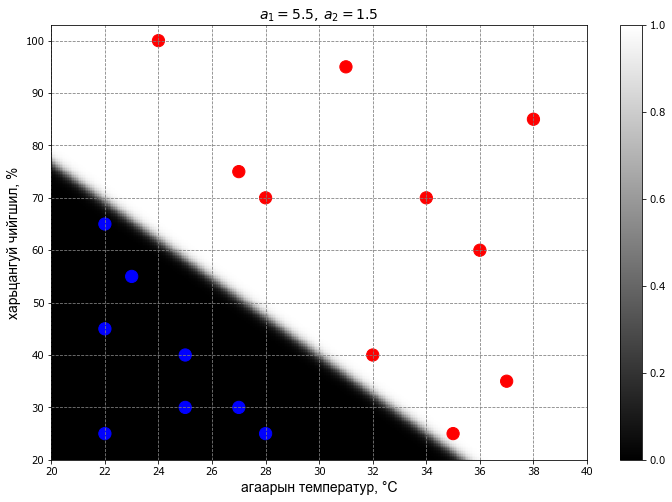

In [1275]:
x1 = 20.
x2 = 40.
y1 = 20.
y2 = 103.
nx = 300
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = sigthi(X,Y,5.5,1.5,an[-1][2])
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.title("$a_1=5.5,\,a_2=1.5$",size=14)
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(x1, x2+dx, 2))
ax.set_yticks(np.arange(y1, y2+dy, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.colorbar()
#plt.savefig("temphump1.png", dpi=150,bbox_inches='tight')
plt.show()

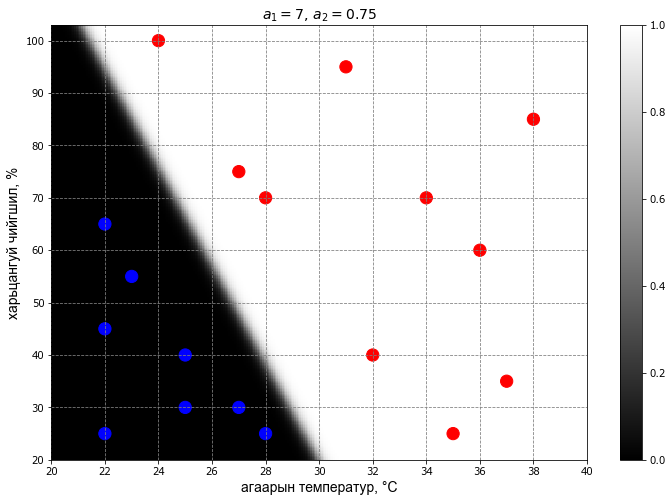

In [1274]:
x1 = 20.
x2 = 40.
y1 = 20.
y2 = 103.
nx = 300
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = sigthi(X,Y,7,.75,an[-1][2])
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
cols=pltcolor([r[2] for r in thi1])
plt.scatter([r[0] for r in thi1],[r[1] for r in thi1],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.title("$a_1=7,\,a_2=0.75$",size=14)
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'харьцангуй чийгшил, %',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(x1, x2+dx, 2))
ax.set_yticks(np.arange(y1, y2+dy, 10))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.colorbar()
#plt.savefig("temphump2.png", dpi=150,bbox_inches='tight')
plt.show()

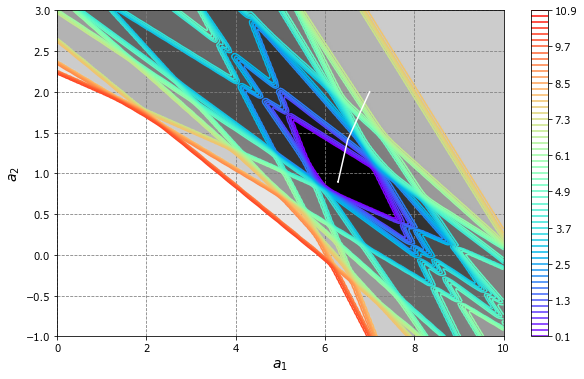

In [1267]:
x1 = 0.
x2 = 10.
y1 = -1.
y2 = 3.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Epnlist12(X,Y,an[-1][2],thi1)
plt.figure(figsize=(10,6))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.plot([r[0] for r in an],[r[1] for r in an],'w')
plt.xlabel('$a_1$',size=14)
plt.ylabel('$a_2$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elg212.png", dpi=200,bbox_inches='tight')
plt.show()

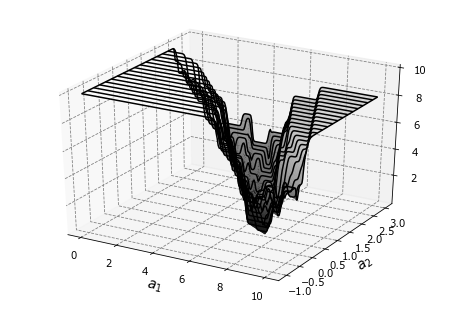

In [1170]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gray)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=1000,color='black')
#ax.contour3D(X, Y, Z, 20, cmap='rainbow')
#ax.view_init(30, -80)
plt.xlabel('$a_1$',size=14)
plt.ylabel('$a_2$',size=14)
#plt.savefig("epin3d1.png", dpi=200,bbox_inches='tight')
pylab.show()

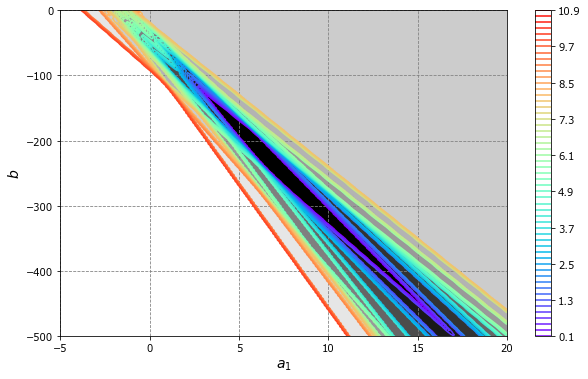

In [1178]:
x1 = -5.
x2 = 20.
y1 = -500.
y2 = 0.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Epnlist13(X,Y,an[-1][1],thi1)
plt.figure(figsize=(10,6))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
#plt.plot([r[0] for r in an],[r[2] for r in an],'w')
plt.xlabel('$a_1$',size=14)
plt.ylabel('$b$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elg2.png", dpi=200,bbox_inches='tight')
plt.show()

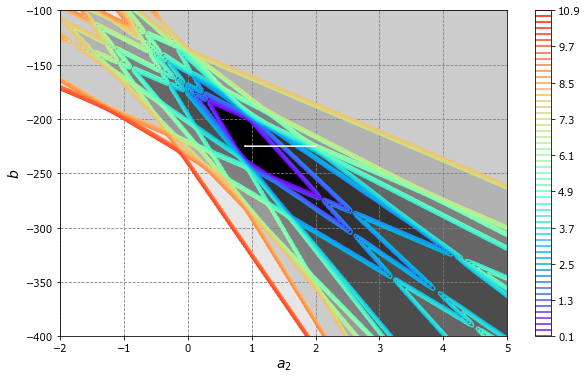

In [1202]:
x1 = -2.
x2 = 5.
y1 = -400.
y2 = -100.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Epnlist23(X,Y,an[-1][0],thi1)
plt.figure(figsize=(10,6))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
plt.plot([r[1] for r in an],[r[2] for r in an],'w')
plt.xlabel('$a_2$',size=14)
plt.ylabel('$b$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("elg223.png", dpi=200,bbox_inches='tight')
plt.show()

In [1297]:
def Epn1(a,b,xx,yy):
    n = len(a)-1
    e = 0
    for x,y in zip(xx,yy):
        z = a[-1]
        for j in range(n):
            z += a[j]*sigm(b[j]*x+b[j+n])
        s = sigm(z) - y
        e += s*s
    return e

def Epn1list34(X,Y,a,b,xx,yy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Epn1(a,[X[i,k],Y[i,k]]+b[2:],xx,yy)
    return Z

def Epn1list12(X,Y,a,b,xx,yy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Epn1([X[i,k],Y[i,k]]+a[2:],b,xx,yy)
    return Z

def Epn1list35(X,Y,a,b,xx,yy):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            Z[i,k] = Epn1(a,[X[i,k],b[1],Y[i,k]]+b[3:],xx,yy)
    return Z

def dEpn1(a,b,xx,yy):
    na = len(a)
    nb = len(b)
    n = na - 1
    d = [0]*(na+nb)
    for x,y in zip(xx,yy):
        z = a[-1]
        for j in range(n):
            z += a[j]*sigm(b[j]*x+b[j+n])
        dss = (sigm(z) - y)*dsigm(z)
        d[n] += dss
        for j in range(n):
            zj = b[j]*x+b[j+n]
            d[j] += dss*sigm(zj)
            tj = dss*a[j]*dsigm(zj)
            d[j+na+n] += tj
            d[j+na] += tj*x
    return d

In [1286]:
apn1 = graddescent(lambda a:dEpn1(a[:3],a[3:7],xx4,yy4),[1,1,-1,2,-2,-30,70],.5,10000)
apn1[-1]

[8.4452816677463733,
 8.4452619145671939,
 -12.753885415115974,
 2.0164786138264765,
 -1.9993285957550044,
 -29.999909186073005,
 70.000476369112889]

In [1287]:
Epn1([1,1,-1],[2,-2,-30,70],xx4,yy4),Epn1(apn1[-1][:3],apn1[-1][3:],xx4,yy4)

(1.7170207663028507, 0.0017995666430544463)

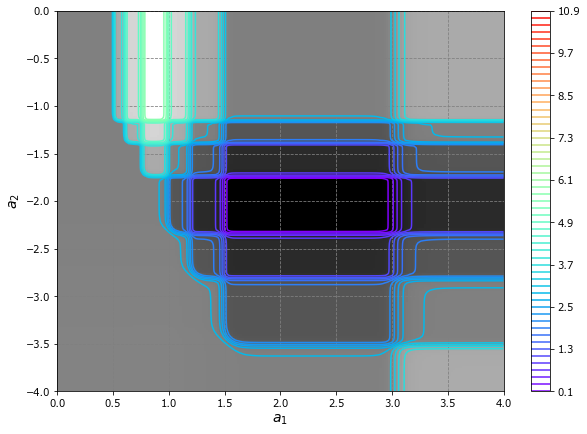

In [1302]:
x1 = 0.
x2 = 4.
y1 = -4.
y2 = 0.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Epn1list34(X,Y,apn1[-1][:3],apn1[-1][3:],xx4,yy4)
plt.figure(figsize=(10,7))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
#plt.plot([r[3] for r in apn1],[r[4] for r in apn1],'w')
plt.xlabel('$a_1$',size=14)
plt.ylabel('$a_2$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("pp1lg.png", dpi=200,bbox_inches='tight')
plt.show()

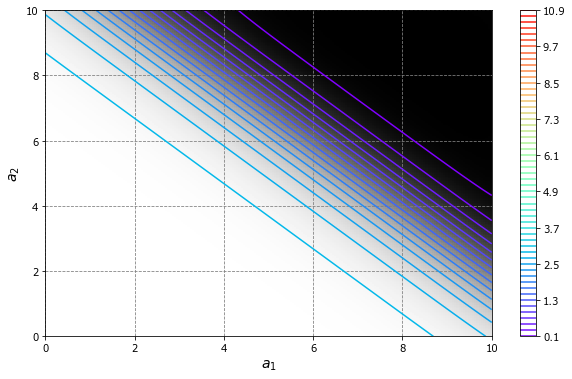

In [1296]:
x1 = 0.
x2 = 10.
y1 = 0.
y2 = 10.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Epn1list12(X,Y,apn1[-1][:3],apn1[-1][3:],xx4,yy4)
plt.figure(figsize=(10,6))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
#plt.plot([r[3] for r in apn1],[r[4] for r in apn1],'w')
plt.xlabel('$c_1$',size=14)
plt.ylabel('$c_2$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("pp1lg.png", dpi=200,bbox_inches='tight')
plt.show()

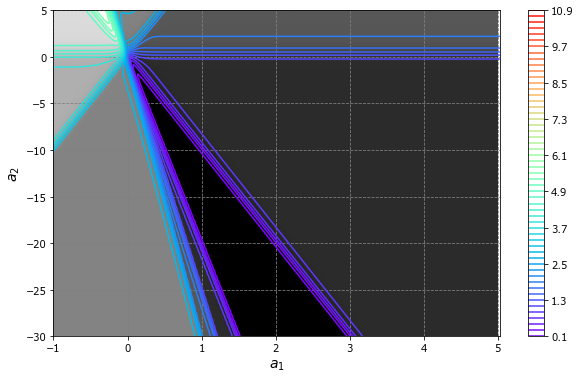

In [1300]:
x1 = -1.
x2 = 5.
y1 = -30.
y2 = 5.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = Epn1list35(X,Y,apn1[-1][:3],apn1[-1][3:],xx4,yy4)
plt.figure(figsize=(10,6))
cvals = np.arange(.1,11.,.2)
#cvals = np.append(cvals,[2**i for i in np.arange(-1,6,.01)])
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.gray, origin='lower',aspect='auto')
plt.contour(X, Y, Z,levels=cvals, cmap=plt.cm.rainbow, origin='lower')
plt.colorbar()
#plt.plot([r[3] for r in apn1],[r[4] for r in apn1],'w')
plt.xlabel('$a_1$',size=14)
plt.ylabel('$a_2$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'gray'
#ax.grid(color='r', linestyle='-', linewidth=2)
plt.grid()
#plt.savefig("pp1lg.png", dpi=200,bbox_inches='tight')
plt.show()

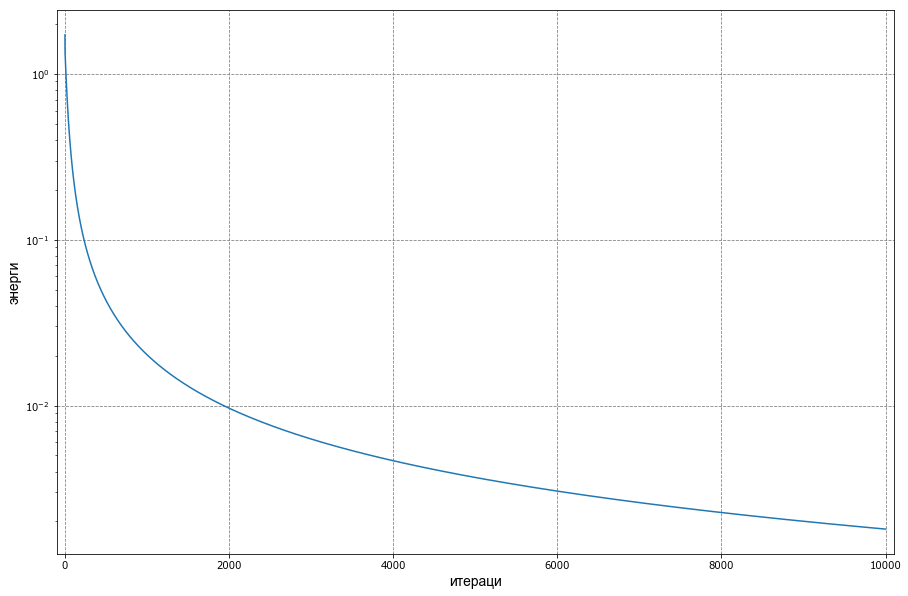

In [868]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(apn1)
plt.plot([Epn1(apn1[i][:3],apn1[i][3:7],xx4,yy4) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

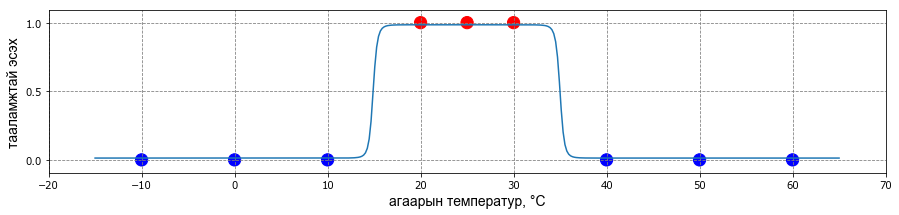

In [1305]:
xres=np.linspace(-15,65,400)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[sigm(apn1[-1][0]*sigm(linf(x,apn1[-1][3],apn1[-1][5]))+apn1[-1][1]*sigm(linf(x,apn1[-1][4],apn1[-1][6]))+apn1[-1][2]) for x in xres])
cols=pltcolor(yy4)
plt.scatter(xx4,yy4,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
plt.xlabel(u'агаарын температур, °C',fontproperties=prop, size=14)
plt.ylabel(u'тааламжтай эсэх',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1g.png", dpi=150,bbox_inches='tight')
plt.show()

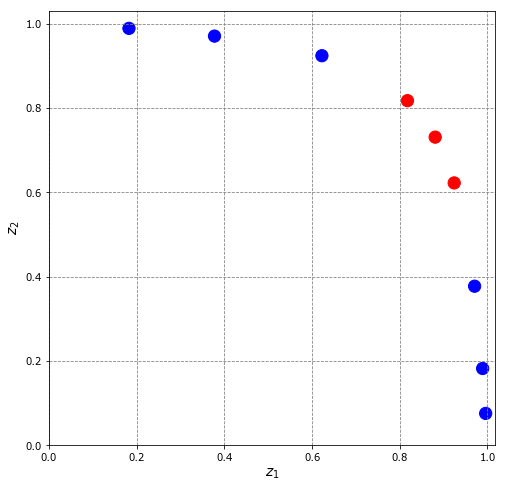

In [1332]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
cols=pltcolor(yy4)
plt.scatter([sigm(linf(x,.1,-.5)) for x in xx4],[sigm(linf(x,-.1,3.5)) for x in xx4],s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
plt.xlabel(u'$z_1$',fontproperties=prop, size=14)
plt.ylabel(u'$z_2$',fontproperties=prop, size=14)
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.03)
ax.set_xticks(np.arange(0, 1.2, .2))
ax.set_yticks(np.arange(0, 1.2, .2))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("pp1hum.png", dpi=150,bbox_inches='tight')
plt.show()

In [990]:
xx5=[-10,-5,0,7,10,15,19,25,29,36,40,46,50,57,60]
yy5=[0,0,0,1,1,1,1,0,0,0,0,1,1,1,1]

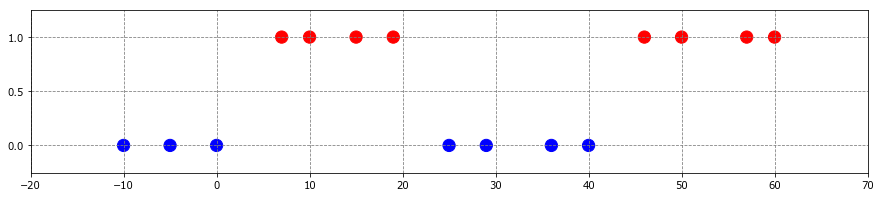

In [991]:
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
cols=pltcolor(yy5)
plt.scatter(xx5,yy5,s=150,c=cols)
#plt.plot(xx1,yy1,'bo')
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.2)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [995]:
apn1 = graddescent(lambda a:dEpn1(a[:3],a[3:7],xx5,yy5),[1,1,-1,2,-2,-30,70],.5,5000)
apn1[-1]

[8.1456083860313377,
 4.0894180879954245,
 -8.1443230441144827,
 5.2091029832353835,
 -3.3140931249160759,
 -29.615867587696382,
 69.953223866786004]

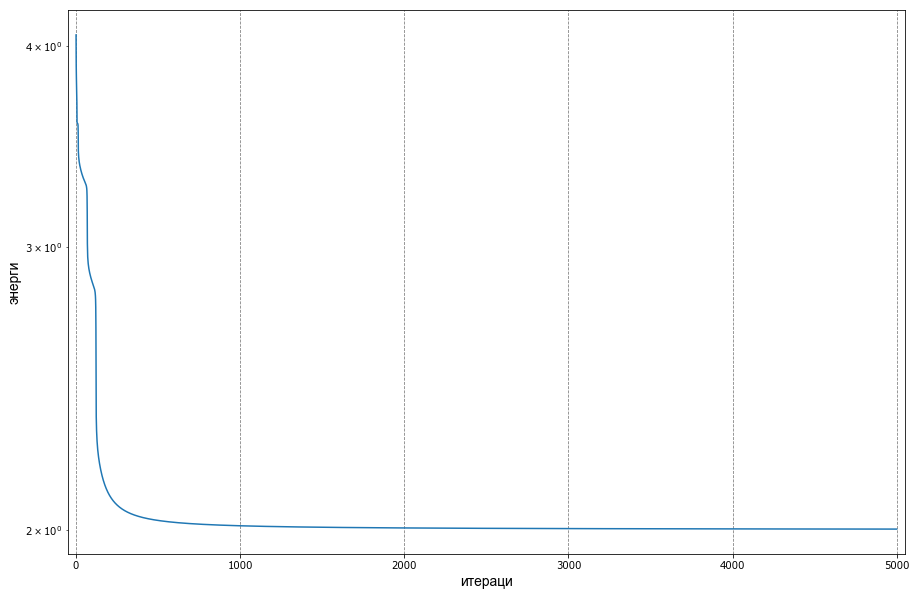

In [996]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(apn1)
plt.plot([Epn1(apn1[i][:3],apn1[i][3:7],xx5,yy5) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

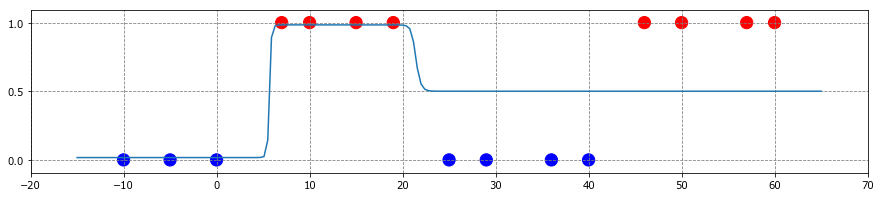

In [997]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[sigm(apn1[-1][0]*sigm(linf(x,apn1[-1][3],apn1[-1][5]))+apn1[-1][1]*sigm(linf(x,apn1[-1][4],apn1[-1][6]))+apn1[-1][2]) for x in xres])
cols=pltcolor(yy5)
plt.scatter(xx5,yy5,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [998]:
apn2 = gradmomentum(lambda a:dEpn1(a[:3],a[3:7],xx5,yy5),[1,1,-1,2,-2,-30,70],.5,1000,.8)
apn2[-1]

[6.4115228641578765,
 3.216618730323257,
 -6.4047057433605419,
 5.2088899470418122,
 -3.284594314036192,
 -29.643577595552973,
 69.971185502376656]

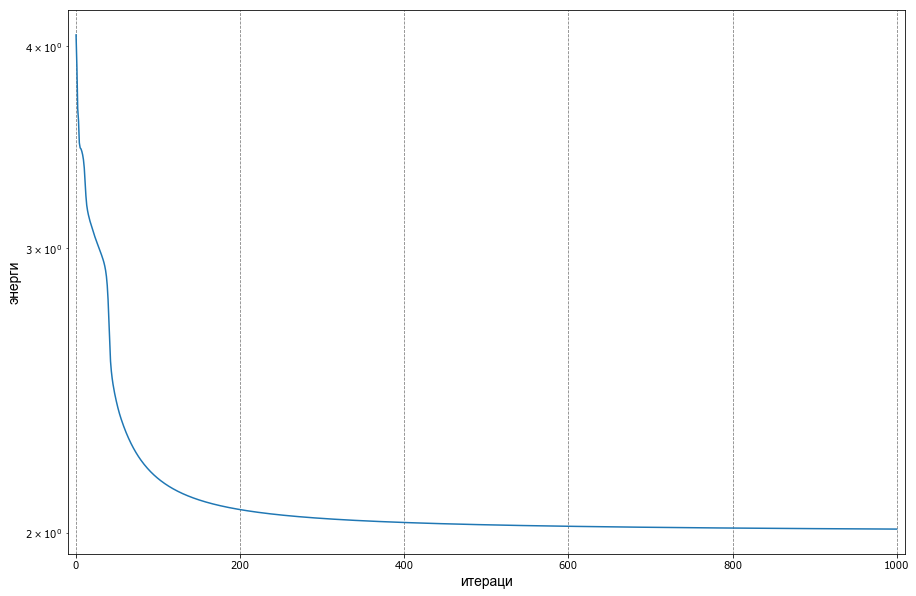

In [999]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(apn2)
plt.plot([Epn1(apn2[i][:3],apn2[i][3:7],xx5,yy5) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

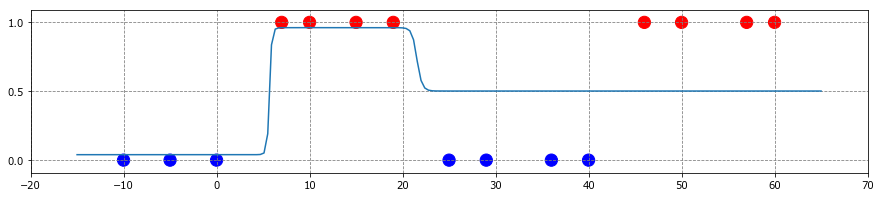

In [1000]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[sigm(apn2[-1][0]*sigm(linf(x,apn2[-1][3],apn2[-1][5]))+apn2[-1][1]*sigm(linf(x,apn2[-1][4],apn2[-1][6]))+apn2[-1][2]) for x in xres])
cols=pltcolor(yy5)
plt.scatter(xx5,yy5,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [1019]:
nn = 3
mm = 3*nn + 1
apn11 = graddescent(lambda a:dEpn1(a[:nn+1],a[nn+1:mm],xx5,yy5),[1,1,1,-1,2,-2,2,-30,70,-110],.5,5000)
apn11[-1]

[7.8569237042640792,
 7.8343018737292116,
 8.4798598475274858,
 -11.774378245911191,
 5.2409406575932715,
 -3.174895673301156,
 2.5450514725390132,
 -29.612333999334133,
 69.958752955793258,
 -109.99461244810642]

In [1016]:
nn = 3
mm = 3*nn + 1
apn11 = gradmomentum(lambda a:dEpn1(a[:nn+1],a[nn+1:mm],xx5,yy5),np.random.randn(mm)*.01,.5,10000,.8)
apn11[-1]

[1.7812800439936014,
 1.0533397342562889,
 -4.1502830039229899,
 -2.1415214516886296,
 1.6014106353764099,
 1.4691244411519495,
 -1.8157254538016818,
 -0.96225450351105102,
 -0.51838094047727534,
 1.7046229307172809]

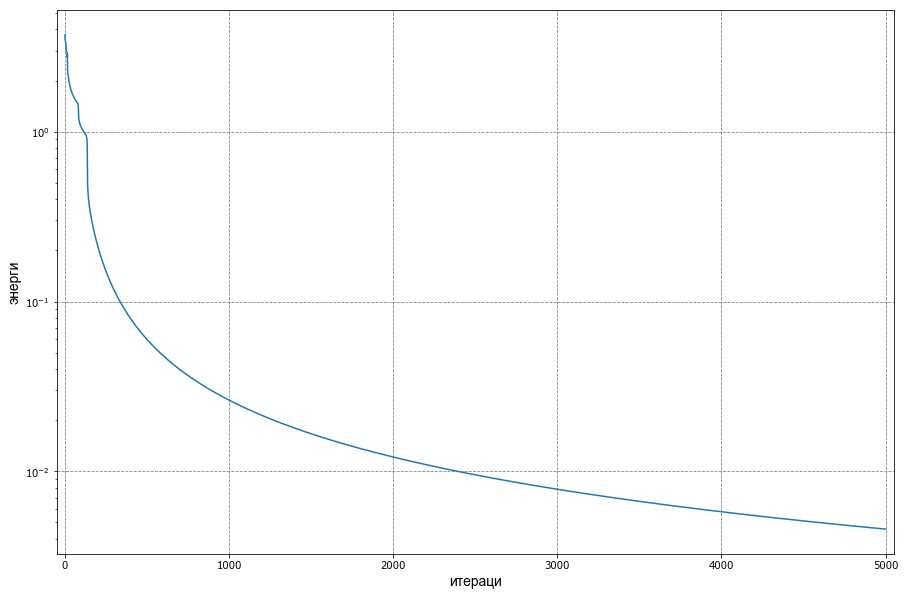

In [1020]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(apn11)
plt.plot([Epn1(apn11[i][:nn+1],apn11[i][nn+1:],xx5,yy5) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [814]:
def nnf(x,a):
    n = int(len(a)/3)
    na = n + 1
    z = a[n]
    for j in range(n):
        z += a[j]*sigm(a[j+na]*x+a[j+na+n])
    return sigm(z)

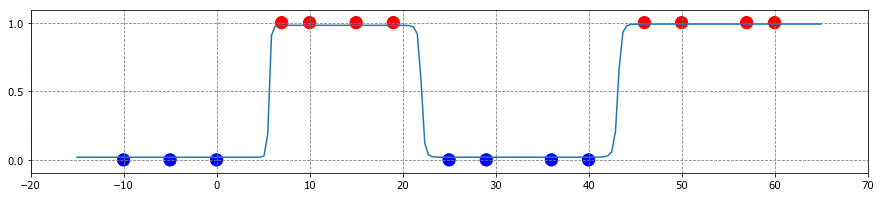

In [1021]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[nnf(x,apn11[-1]) for x in xres])
cols=pltcolor(yy5)
plt.scatter(xx5,yy5,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

In [1043]:
nn = 3
mm = 3*nn + 1
apn11 = graddescentn(lambda a:dEpn1(a[:nn+1],a[nn+1:mm],xx5,yy5),np.random.randn(mm)*.01,.5,10000,8,.9)
apn11[-1]

[2.851488115696124,
 0.22858239849090969,
 -4.020278825463925,
 -2.1583757536573134,
 7.3502603774456059,
 -11.230359284349207,
 -4.5092153990736659,
 -2.6093514257981938,
 10.068336857348509,
 1.9894019992281198]

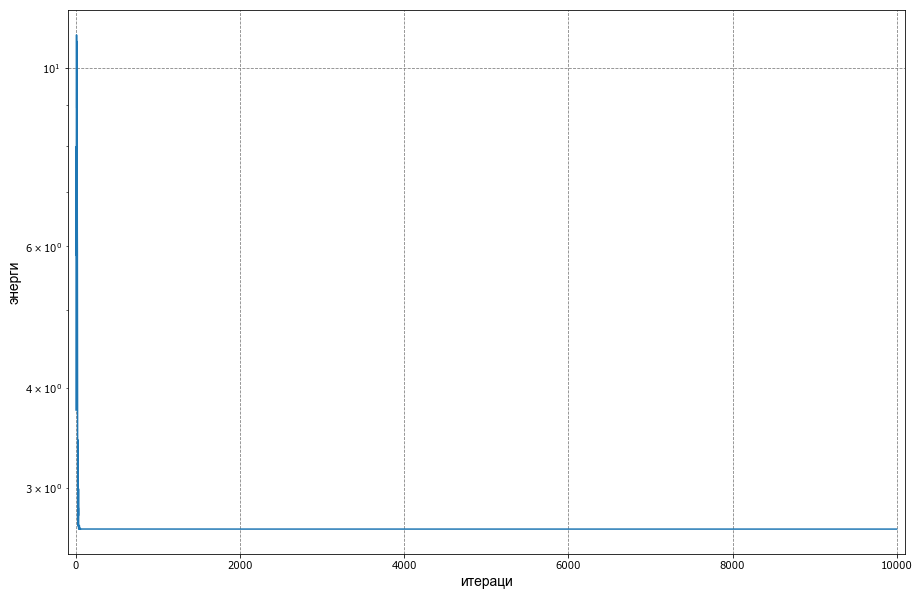

In [1044]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
n = len(apn11)
plt.plot([Epn1(apn11[i][:nn+1],apn11[i][nn+1:],xx5,yy5) for i in range(n)])
plt.xlabel(u'итераци',fontproperties=prop, size=14)
plt.ylabel(u'энерги',fontproperties=prop, size=14)
plt.semilogy()
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
#ax.set_xticks(np.arange(-20, 71, 10))
#ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


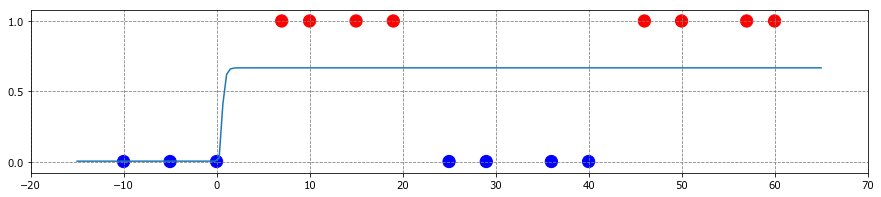

In [1045]:
xres=np.linspace(-15,65,200)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()
plt.plot(xres,[nnf(x,apn11[-1]) for x in xres])
cols=pltcolor(yy5)
plt.scatter(xx5,yy5,s=150,c=cols)
#plt.plot(xx2,yy2,'bo')
#plt.xticks(dplan)
#plt.legend()
plt.margins(.01,.05)
ax.set_xticks(np.arange(-20, 71, 10))
ax.set_yticks(np.arange(0, 1.1, .5))
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
#plt.savefig("temp.png", dpi=150)
plt.show()